# Model 1: Classify images according to furniture category (beds; chairs; dressers; lamps; sofas; tables)


### Install neccessary library

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Step 1: Data Loading and Preprocessing
This step involves importing necessary libraries, defining categories and interior styles, and loading the image data for the furniture items.

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import numpy as np
#from google.colab import files
from IPython.display import Image, display
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### 1.1 Define the Categories and Interior Styles

We define the categories and interior styles that will be used for classifying the furniture item.


In [3]:

data_dir = 'Furniture_Dataa'
categories = ['beds', 'chairs', 'dressers', 'lamps', 'sofas', 'tables']
interior_styles = ['Asian', 'Beach', 'Contemporary', 'Craftsman', 'Eclectic', 'Farmhouse',
                   'Industrial', 'Mediterranean', 'Midcentury', 'Modern', 'Rustic', 'Scandinavian',
                   'Southwestern', 'Traditional', 'Transitional', 'Tropical', 'Victorian']



In [4]:
data_dir


'Furniture_Dataa'

### 1.2 Load the Image Data

This function loads images from the specified directory and preprocesses them for model training.

In [5]:
def load_images(data_dir):
    images = []
    labels = []
    styles = []
    for category in categories:
        category_dir = os.path.join(data_dir, category)
        for style in interior_styles:
            style_dir = os.path.join(category_dir, style)

            if not os.path.exists(style_dir):
                continue
            for filename in os.listdir(style_dir):
                img = load_img(os.path.join(style_dir, filename), target_size=(224, 224))
                img_array = img_to_array(img)

                img_array = img_array / 255.0
                images.append(img_array)
                labels.append(categories.index(category))
                styles.append(interior_styles.index(style))
    return np.array(images), np.array(labels), np.array(styles)

### 1.3 Load and preprocess images

In [6]:
images, labels, styles = load_images(data_dir)


### 1.4 Split data into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, s_train, s_test = train_test_split(images, labels, styles, test_size=0.2, random_state=42)

### Step 2: Building and Evaluating the Model with K-Fold Cross Validation

In this step, we define our convolutional neural network (CNN) model for classifying furniture types and evaluate it using K-Fold Cross Validation. This method will help us ensure the model's robustness and reliability.


In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

def build_category_model():
    model = Sequential([
        Input(shape=(224, 224, 3)),  # Add Input layer with specified input shape
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming X and y are your data and labels
X = np.array(images)  # Replace with your actual image data
y = np.array(labels)  # Replace with your actual labels

# Define the number of folds
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []

fold_no = 1

for train_index, val_index in kf.split(X):
    print(f'Training for fold {fold_no} ...')
    
    # Split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Build model
    category_model = build_category_model()
    category_model.summary()
    # Train the model
    history = category_model.fit(X_train, y_train, epochs=15, batch_size=100, validation_data=(X_val, y_val))
    
    # Evaluate the model
    scores = category_model.evaluate(X_val, y_val, verbose=0)
    print(f'Score for fold {fold_no}: {category_model.metrics_names[0]} of {scores[0]}; {category_model.metrics_names[1]} of {scores[1]}')
    
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    fold_no += 1

# Provide average accuracy and loss across all folds
print(f'Average accuracy: {np.mean(acc_per_fold)}% (+- {np.std(acc_per_fold)})')
print(f'Average loss: {np.mean(loss_per_fold)}')



Training for fold 1 ...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,399,174 (169.37 MB)

 Trainable params: 44,399,174 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3091 - loss: 2.7728 - val_accuracy: 0.6110 - val_loss: 1.1272
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6886 - loss: 0.9410 - val_accuracy: 0.7008 - val_loss: 0.8732
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7736 - loss: 0.6677 - val_accuracy: 0.7486 - val_loss: 0.7743
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8354 - loss: 0.5038 - val_accuracy: 0.7830 - val_loss: 0.7221
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8891 - loss: 0.3426 - val_accuracy: 0.7886 - val_loss: 0.7119
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9193 - loss: 0.2380 - val_accuracy: 0.7992 - val_loss: 0.8206
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9561 - loss: 0.1475 - val_accuracy: 0.7844 - val_loss: 0.8453
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9669 - loss: 0.1068 - val_accuracy: 0.8118 - val_loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,399,174 (169.37 MB)

 Trainable params: 44,399,174 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2790 - loss: 3.0323 - val_accuracy: 0.6327 - val_loss: 1.0220
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6588 - loss: 0.9992 - val_accuracy: 0.7458 - val_loss: 0.7763
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7605 - loss: 0.7102 - val_accuracy: 0.7872 - val_loss: 0.6499
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8219 - loss: 0.5607 - val_accuracy: 0.7928 - val_loss: 0.6404
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8624 - loss: 0.4103 - val_accuracy: 0.8287 - val_loss: 0.5702
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9079 - loss: 0.2922 - val_accuracy: 0.8315 - val_loss: 0.6155
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9355 - loss: 0.1888 - val_accuracy: 0.8041 - val_loss: 0.6857
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9429 - loss: 0.1806 - val_accuracy: 0.8357 - val_loss:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,399,174 (169.37 MB)

 Trainable params: 44,399,174 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2822 - loss: 3.8344 - val_accuracy: 0.6121 - val_loss: 1.0890
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6259 - loss: 1.0288 - val_accuracy: 0.7309 - val_loss: 0.7812
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7650 - loss: 0.6721 - val_accuracy: 0.7702 - val_loss: 0.6789
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8306 - loss: 0.5252 - val_accuracy: 0.7850 - val_loss: 0.6047
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8854 - loss: 0.3498 - val_accuracy: 0.7941 - val_loss: 0.5829
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9154 - loss: 0.2643 - val_accuracy: 0.7948 - val_loss: 0.6700
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9486 - loss: 0.1680 - val_accuracy: 0.8067 - val_loss: 0.6486
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9583 - loss: 0.1172 - val_accuracy: 0.7983 - val_loss:

### Step 3: Image Upload and Classification

In this step, we create an interface for uploading images and classify the uploaded images into furniture categories. The images are displayed in a grid format along with their predicted categories.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


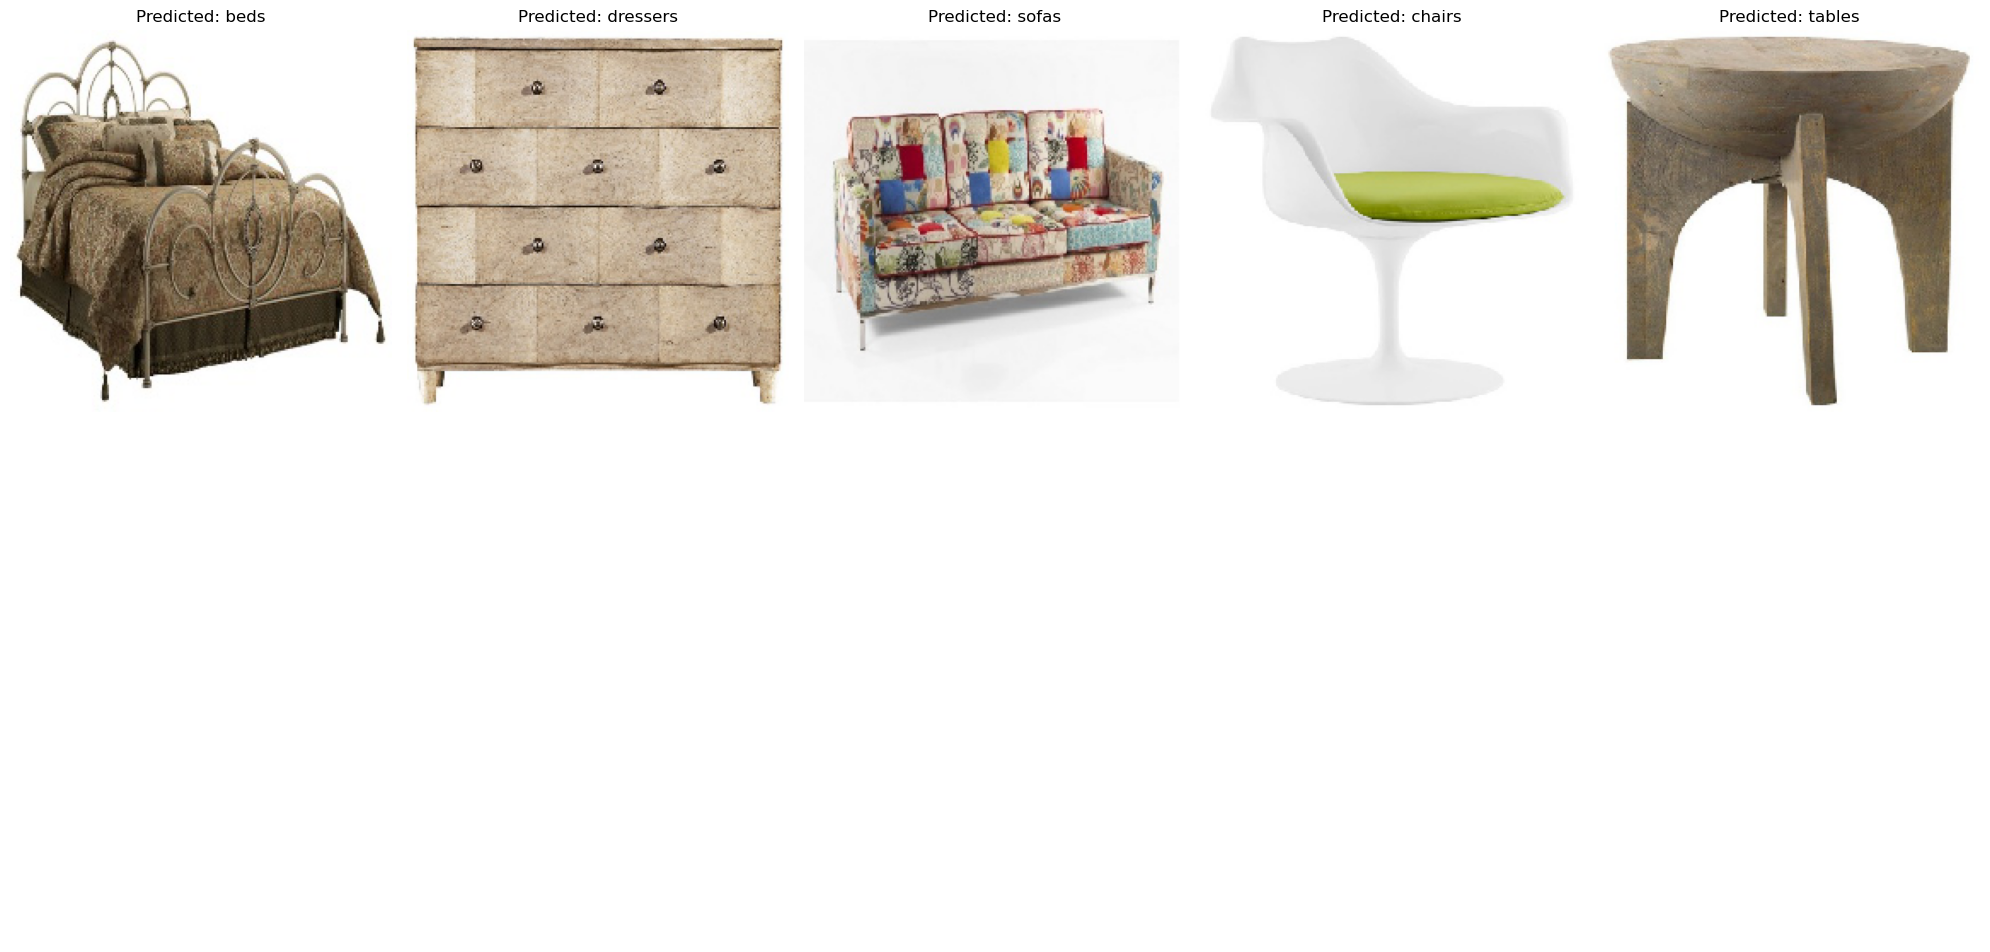

In [10]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def classify_images_from_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # List all files in the directory
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Check if the folder is empty
    if not image_files:
        print(f"The folder '{folder_path}' is empty.")
        return

    # Create a figure for displaying images in a grid
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    
    for i, image_file in enumerate(image_files):
        if i >= 10:
            break  # Only display up to 10 images (2 rows * 5 images per row)
        
        img_path = os.path.join(folder_path, image_file)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        prediction = category_model.predict(img_array)
        predicted_category = categories[np.argmax(prediction)]
        
        ax = axes[i // 5, i % 5]  # Determine the row and column indices
        ax.imshow(img)
        ax.set_title(f"Predicted: {predicted_category}")
        ax.axis('off')
    
    # Hide any remaining unused subplots
    for j in range(i + 1, 10):
        ax = axes[j // 5, j % 5]
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Specify the folder path
folder_path = 'Input_Furniture'
classify_images_from_folder(folder_path)


In [ ]:
A